# results visualization

In [60]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


with open('output_MRP/test_tables_train8_test2.pkl', 'rb') as file:
    test_list = pickle.load(file)

with open('output_MRP/train_tables_train8_test2.pkl', 'rb') as file:
    train_list = pickle.load(file)



In [80]:
count = 0
for table in test_list:
    table['cum_ret'] = table['daily_ret'].cumsum()

    if table['cum_ret'][-1] < 0:
        count += 1
print(count)


23


/var/folders/ys/r2q6b391541glytpwg3rrt7h0000gn/T/ipykernel_1773/464914002.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if table['cum_ret'][-1] < 0:


In [82]:
len(test_list)

82

In [81]:
test_list[1]

,portfolio_value,residuals,threshold,trade_signal,unwind_signal,position,cum_ret,daily_ret,ret
date,,,,,,,,,
1990-10-26,18.537439,-0.120365,0.311096,0,0,0.0,0.000000,0.000000,NaN
1990-10-29,18.893910,0.236106,0.311096,0,1,0.0,0.000000,0.000000,NaN
1990-10-30,18.912766,0.254963,0.311096,0,0,0.0,0.000000,0.000000,NaN
1990-10-31,18.272172,-0.385632,0.311096,1,1,1.0,0.000000,0.000000,NaN
1990-11-01,18.130757,-0.527047,0.311096,1,0,1.0,-0.045457,-0.045457,-inf
1990-11-02,18.457196,-0.200608,0.311096,0,0,1.0,0.059475,0.104932,-2.308371
1990-11-05,17.613194,-1.044610,0.311096,1,0,1.0,-0.211825,-0.271300,-4.561585
1990-11-06,18.183407,-0.474397,0.311096,1,0,1.0,-0.028533,0.183292,-0.865298
1990-11-07,18.221778,-0.436026,0.311096,1,0,1.0,-0.016199,0.012334,-0.432279


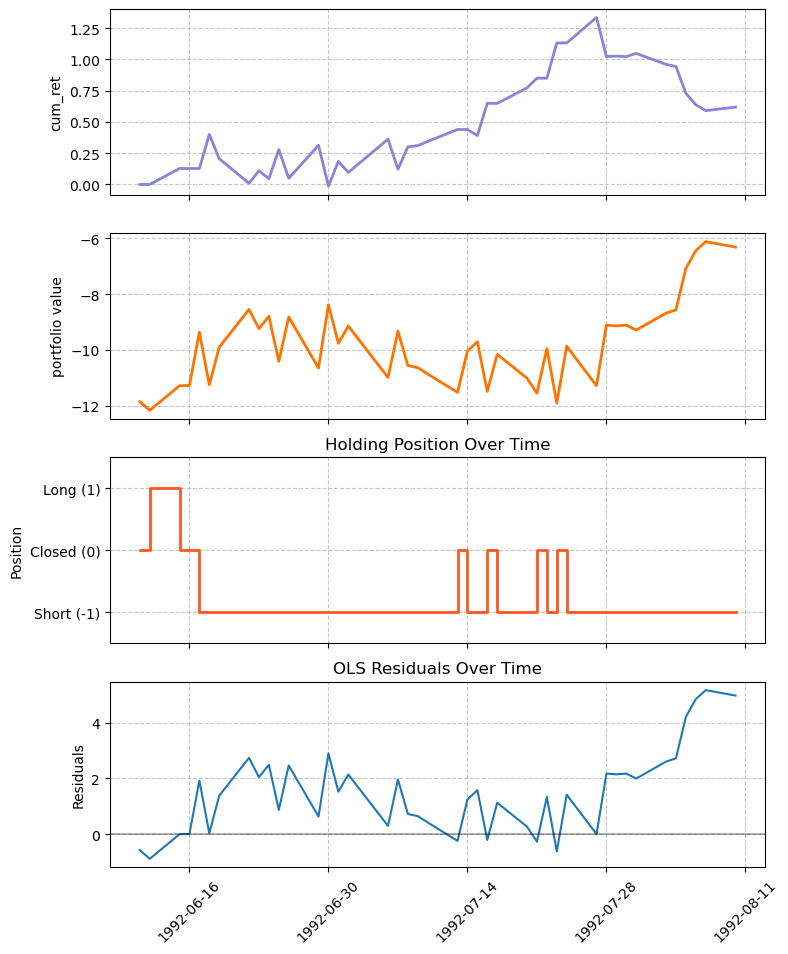

In [78]:
idx=11
trade_table = test_list[idx]

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

dates = trade_table.index

# Create figure with subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 10), sharex=True)
# fig.suptitle('Portfolio Performance Dashboard', fontsize=16)

# Format x-axis dates
date_format = mdates.DateFormatter('%Y-%m-%d')
for ax in [ax1, ax2, ax3, ax4]:
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    ax.grid(True, linestyle='--', alpha=0.7)

# 1. Portfolio PnL over time
ax1.plot(dates, trade_table['cum_ret'], color='#8884d8', linewidth=2)
# ax1.axhline(y=1, color='black', linestyle='-', alpha=0.3)
ax1.set_ylabel('cum_ret')

# 2. Stock prices over time
ax2.plot(dates, trade_table['portfolio_value'], color='#ff7300', linewidth=2)
ax2.set_ylabel('portfolio value')

# 3. Holding position over time
ax3.step(dates, trade_table['position'], color='#ff5722', linewidth=2, where='post')
# ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax3.set_title('Holding Position Over Time')
ax3.set_ylabel('Position')
ax3.set_yticks([-1, 0, 1])
ax3.set_yticklabels(['Short (-1)', 'Closed (0)', 'Long (1)'])
ax3.set_ylim(-1.5, 1.5)

# 4. residuals plot
ax4.plot(dates, trade_table['residuals'])
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax4.set_title('OLS Residuals Over Time')
ax4.set_ylabel('Residuals')



# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)

# Save or display the figure
# plt.savefig('portfolio_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


## Part I: statistics report

In [76]:
def trade_table_statistics(table):

    # calculate the daily return
    table['ret'] = table['cum_ret'] / table['cum_ret'].shift(1) - 1

    # 1. calcualte number of openings/closings achieved during the period
    prev_pos = table['position'].shift(1)
    prev_pos.iloc[0] = 0
    mask = (table['position'] == 0)
    num_closings = np.sum(np.abs(prev_pos[mask]))

    mask = (prev_pos == 0)
    num_openings = np.sum(np.abs(table['position'][mask]))


    # 2. cum return over the period
    final_cum_ret = table['cum_ret'].iloc[-1]

    # 3. start_date and end_date
    start_date = table.index[0]
    end_date = table.index[-1]

    # 4. max_drawdown
    # cum_ret = table['cum_ret']

    # def calculate_max_drawdown(value_series):
    #     curr_max = value_series.iloc[0]
    #     max_drawdown = 0

    #     for val in value_series:
    #         if val > curr_max:
    #             curr_max = val

    #         drawdown = val / curr_max - 1
    #         if drawdown < max_drawdown:
    #             max_drawdown = drawdown


    #     return max_drawdown

    # max_drawdown = calculate_max_drawdown(cum_ret)

    # 5. nav percentile
    # cum_ret = table['cum_ret']
    # nav_min = np.min(cum_ret)
    # nav_max = np.max(cum_ret)
    # nav_median = np.median(cum_ret)
    # nav_25 = np.percentile(cum_ret, 25)
    # nav_75 = np.percentile(cum_ret, 75)

    # 6. sharpe ratio (daily basis)
    daily_ret = table['ret'].iloc[1:] # first ret is NaN
    sharpe_daily = np.mean(daily_ret) / np.std(daily_ret)

    # 7. geometric averate daily ret
    # cum_ret = table['cum_ret'].iloc[-1]
    # num_periods = len(table) - 1
    # average_daily_ret = cum_ret ** (1/num_periods) - 1 

    # 8. average holding period
    def calculate_holding_periods(position_series):
        total_holding_days = 0
        total_num_opens = 0
        curr_open = False

        for position in position_series:
            if not curr_open:
                if position != 0:
                    curr_open = True
                    total_num_opens += 1
            else:
                total_holding_days += 1
                if position == 0:
                    curr_open = False
        average_holding_period = total_holding_days / total_num_opens

        return average_holding_period
    position_series = table['position']
    average_holding_period = calculate_holding_periods(position_series)

    stats = {
        'start_date': start_date,
        'end_date': end_date,

        'sharpe_daily': sharpe_daily,
        'cum_return': final_cum_ret,
        # 'max_drawdown': max_drawdown,
        # 'average_daily_ret': average_daily_ret,

        # 'nav_min': nav_min,
        # 'nav_25': nav_25,
        # 'nav_median': nav_median,
        # 'nav_75': nav_75,
        # 'nav_max': nav_max,

        'num_openings': num_openings,
        'num_closings': num_closings,
        'average_holding_period': average_holding_period,
    }
    
    return stats


def create_stats_summary(table_list):
    summary_df = pd.DataFrame()
    
    for table in table_list:

        stats = trade_table_statistics(table)
        stats_df = pd.DataFrame([stats])
        summary_df = pd.concat([summary_df, stats_df], ignore_index=True)
    
    return summary_df

# stats_df = create_stats_summary(test_list)
stats_df = create_stats_summary(test_list)
stats_df.head()


,start_date,end_date,sharpe_daily,cum_return,num_openings,num_closings,average_holding_period
0,1990-08-29,1990-10-26,NaN,-0.327694,1.0,0.0,41.000000
1,1990-10-26,1990-12-26,NaN,1.340214,5.0,4.0,6.600000
2,1990-12-26,1991-02-25,NaN,-0.089603,3.0,2.0,11.333333
3,1991-02-25,1991-04-24,NaN,3.878579,9.0,8.0,3.111111
4,1991-04-24,1991-06-21,NaN,1.138287,3.0,2.0,12.666667


In [77]:
stats_df.describe()

,start_date,end_date,sharpe_daily,cum_return,num_openings,num_closings,average_holding_period
count,82,82,0.0,82.000000,82.000000,82.000000,82.000000
mean,1997-03-26 12:52:40.975609728,1997-05-24 22:14:38.048780544,NaN,0.942768,3.231707,2.268293,18.116686
min,1990-08-29 00:00:00,1990-10-26 00:00:00,NaN,-4.123274,1.000000,0.000000,2.625000
25%,1993-12-09 06:00:00,1994-02-07 12:00:00,NaN,-0.105560,1.250000,1.000000,6.750000
50%,1997-03-25 00:00:00,1997-05-22 00:00:00,NaN,0.633232,3.000000,2.000000,12.333333
75%,2000-07-08 18:00:00,2000-09-05 12:00:00,NaN,1.671760,4.000000,3.750000,32.750000
max,2003-10-29 00:00:00,2003-12-29 00:00:00,NaN,8.469398,9.000000,8.000000,41.000000
std,NaN,NaN,NaN,1.653534,1.970766,1.962920,13.896184


In [54]:
table = test_list[0]

table

,portfolio_value,residuals,threshold,trade_signal,unwind_signal,position,cum_ret,daily_ret,ret
date,,,,,,,,,
1990-08-29,41.286370,-0.448980,0.371677,1,0,1.0,1.000000,0.000000,NaN
1990-08-30,40.722353,-1.012997,0.371677,1,0,1.0,0.848251,-0.151749,-0.151749
1990-08-31,41.186126,-0.549224,0.371677,1,0,1.0,0.954094,0.124779,0.124779
1990-09-04,40.800934,-0.934416,0.371677,1,0,1.0,0.855215,-0.103636,-0.103636
1990-09-05,40.641073,-1.094277,0.371677,1,0,1.0,0.818432,-0.043011,-0.043011
1990-09-06,40.504824,-1.230526,0.371677,1,0,1.0,0.788430,-0.036658,-0.036658
1990-09-07,40.968138,-0.767212,0.371677,1,0,1.0,0.886712,0.124655,0.124655
1990-09-10,39.533538,-2.201812,0.371677,1,0,1.0,0.544458,-0.385980,-0.385980
1990-09-11,40.336644,-1.398706,0.371677,1,0,1.0,0.662103,0.216076,0.216076


In [56]:
(table['daily_ret'] +1).cumprod()

date
1990-08-29    1.000000
1990-08-30    0.848251
1990-08-31    0.954094
1990-09-04    0.855215
1990-09-05    0.818432
1990-09-06    0.788430
1990-09-07    0.886712
1990-09-10    0.544458
1990-09-11    0.662103
1990-09-12    0.736361
1990-09-13    0.723160
1990-09-14    0.712002
1990-09-17    0.869432
1990-09-18    0.889971
1990-09-19    0.822681
1990-09-20    0.470671
1990-09-21    0.596581
1990-09-24    0.710550
1990-09-25    0.493482
1990-09-26    0.526606
1990-09-27    0.499857
1990-09-28    0.597281
1990-10-01    0.671310
1990-10-02    0.677815
1990-10-03    0.541392
1990-10-04    0.575421
1990-10-05    0.405513
1990-10-08    0.476245
1990-10-09    0.390723
1990-10-10    0.448324
1990-10-11    0.355512
1990-10-12    0.283680
1990-10-15    0.411885
1990-10-16    0.377846
1990-10-17    0.327927
1990-10-18    0.315444
1990-10-19    0.313287
1990-10-22    0.223343
1990-10-23    0.234814
1990-10-24    0.295869
1990-10-25    0.294239
1990-10-26    0.323462
Name: daily_ret, dtype: float

In [29]:
np.argmax(stats_df['cum_return'])

27

In [36]:
test_list_filtered[5]

,portfolio_value,residuals,threshold,trade_signal,unwind_signal,position,cum_ret,ret
date,,,,,,,,
1991-06-21,20.251160,-0.018547,0.460676,0,0,0.0,1.000000,NaN
1991-06-24,20.532713,0.263006,0.460676,0,1,0.0,1.000000,0.000000
1991-06-25,20.255546,-0.014161,0.460676,0,1,0.0,1.000000,0.000000
1991-06-26,20.366146,0.096439,0.460676,0,1,0.0,1.000000,0.000000
1991-06-27,19.928190,-0.341517,0.460676,0,1,0.0,1.000000,0.000000
1991-06-28,18.757510,-1.512197,0.460676,1,0,1.0,1.000000,0.000000
1991-07-01,20.418042,0.148335,0.460676,0,1,0.0,1.088526,0.088526
1991-07-02,19.875684,-0.394023,0.460676,0,1,0.0,1.088526,0.000000
1991-07-03,19.626348,-0.643359,0.460676,1,0,1.0,1.088526,0.000000


## Part II: trading snapshot

In [44]:
train_list[22]

,portfolio_value,residuals,threshold,trade_signal,unwind_signal,position,cum_ret
date,,,,,,,
1993-07-27,9.900399,-0.049208,0.492581,0,0,0.0,1.000000
1993-07-28,11.241634,1.292027,0.492581,-1,1,-1.0,1.000000
1993-07-29,11.370349,1.420742,0.492581,-1,0,-1.0,0.988550
1993-07-30,10.332747,0.383139,0.492581,0,0,-1.0,1.078760
1993-08-02,9.497801,-0.451806,0.492581,0,1,0.0,1.165930
...,...,...,...,...,...,...,...
1994-03-16,9.349917,-0.599690,0.492581,1,1,1.0,181.770602
1994-03-17,8.971956,-0.977651,0.492581,1,0,1.0,174.422716
1994-03-18,9.140241,-0.809366,0.492581,1,0,1.0,177.694324


In [9]:
test_list[59]

,portfolio_value,residuals,threshold,trade_signal,unwind_signal,position,cum_ret,ret
date,,,,,,,,
2000-03-27,-0.519310,-2.619542,0.676632,1,0,1.0,1.000000,NaN
2000-03-28,1.350681,-0.749551,0.676632,1,0,1.0,4.600915,3.600915
2000-03-29,-0.453095,-2.553327,0.676632,1,0,1.0,-1.543408,-1.335457
2000-03-30,1.989282,-0.110950,0.676632,0,0,1.0,-9.863039,5.390430
2000-03-31,-0.634299,-2.734531,0.676632,1,0,1.0,3.144913,-1.318858
2000-04-03,3.133503,1.033271,0.676632,-1,1,0.0,21.826018,5.940101
2000-04-04,2.603877,0.503645,0.676632,0,0,0.0,21.826018,0.000000
2000-04-05,3.042019,0.941787,0.676632,-1,0,-1.0,21.826018,0.000000
2000-04-06,3.532231,1.431999,0.676632,-1,0,-1.0,18.308823,-0.161147


In [18]:
count = 0
mean_list  = []
for i in range(len(test_list)):
    table = test_list[i]
    if (table['portfolio_value'] >= 0).all():
        count += 1
        mean_list.append(table['portfolio_value'].mean())

In [19]:
count

77

In [21]:
min(mean_list)

1.5336105721917186

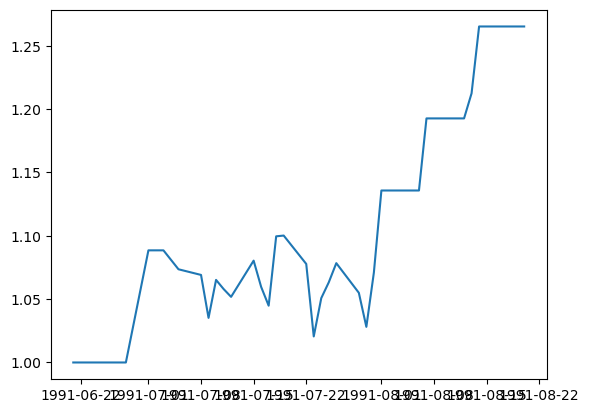

In [5]:
plt.plot(test_list[5]['cum_ret'])

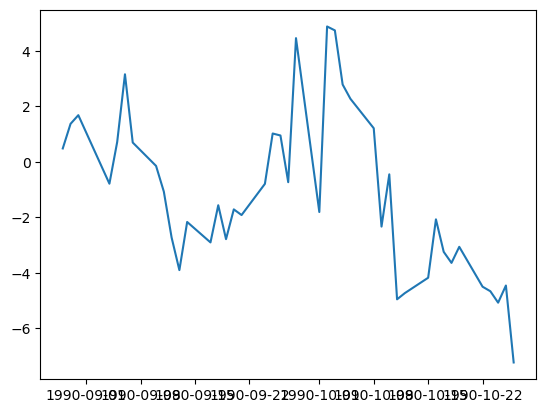

In [52]:
plt.plot(test_list[0]['residuals'])

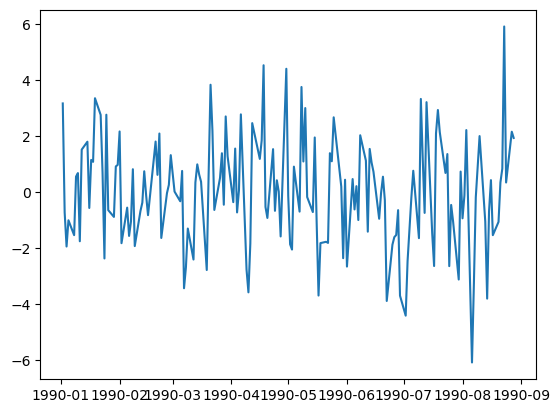

In [53]:
plt.plot(train_list[0]['residuals'])

In [70]:
train_list[1].tail(30)

,portfolio_value,residuals,threshold,trade_signal,unwind_signal,position,cum_ret
date,,,,,,,
1990-09-14,-1.168654,-0.229217,0.998051,0,0,1.0,-2.772798e+19
1990-09-17,-3.803932,-2.864495,0.998051,1,0,1.0,3.479772e+19
1990-09-18,0.931775,1.871212,0.998051,-1,1,0.0,7.811916e+19
1990-09-19,-3.224472,-2.285035,0.998051,1,1,1.0,7.811916e+19
1990-09-20,0.062914,1.002351,0.998051,-1,1,0.0,1.577625e+20
1990-09-21,0.522548,1.461985,0.998051,-1,0,-1.0,1.577625e+20
1990-09-24,0.221528,1.160965,0.998051,-1,0,-1.0,2.486436e+20
1990-09-25,-2.038949,-1.099512,0.998051,1,1,0.0,2.785810e+21
1990-09-26,-1.993913,-1.054476,0.998051,1,0,1.0,2.785810e+21


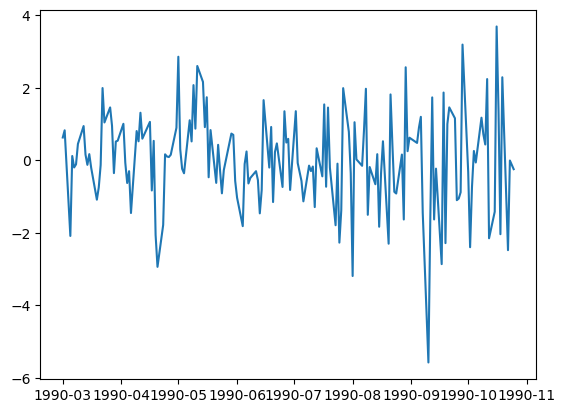

In [61]:
plt.plot(train_list[1]['residuals'])